In [1]:
import pandas as pd
import re
import nltk
import plotly.express as px
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lebro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lebro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
def article(country):
    stop_words = nltk.corpus.stopwords.words('english')
    article_word_cnt = 0
    all_lists = []

    # convert the paragraphs into token
    def tokenize(text):
        tokens = re.split("\W+", text)
        return tokens

    #remove stopwords and empty strings from the list
    def removeStopwords(tokenized):
        filtered = [i for i in tokenized if i not in stop_words]
        while " " in all_lists:
            all_lists.remove(" ")
        return filtered

    for i in range(5):
        df = pd.read_csv(f"./content/{country} {i+1}.txt", delimiter='\t', header=None)
        df.columns = ['Paragraphs']

        # calculate total word count of article
        for j in range(len(df.index)):
            article_word_cnt += len(df["Paragraphs"][j])
        
        df['Tokenized message'] = df['Paragraphs'].apply(lambda x: tokenize(x.lower()))

        # get filtered word list
        df['Filtered'] = df['Tokenized message'].apply(lambda x: removeStopwords(x))

        
        for j in range(len(df.index)):
            all_words = [paragraphs for paragraphs in df['Filtered']]
            all_lists += all_words[j]

    return all_lists, article_word_cnt

def display_wordcloud(all_lists, country):
    wordcloud = WordCloud(width = 1000, height = 1000,
                          min_font_size = 10).generate(str(all_lists))
    plt.figure(figsize=(4,4), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.title(country)
    plt.show()

In [52]:
all_lists_USA, article_word_cnt_USA = article("USA")
all_lists_TL, article_word_cnt_TL = article("Thailand")
all_lists_NZ, article_word_cnt_NZ = article("DB")
all_lists_HK, article_word_cnt_HK = article("HK")
all_lists_DB, article_word_cnt_DB = article("NZ")

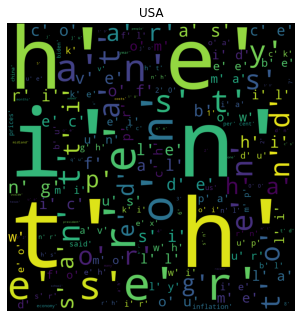

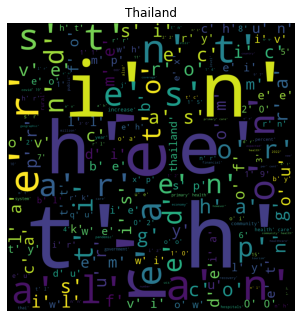

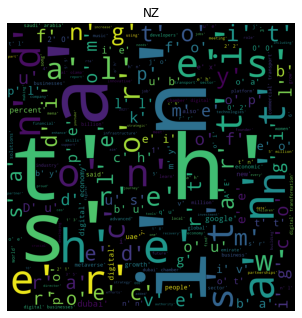

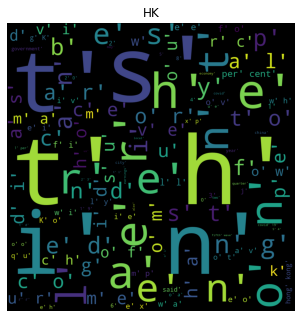

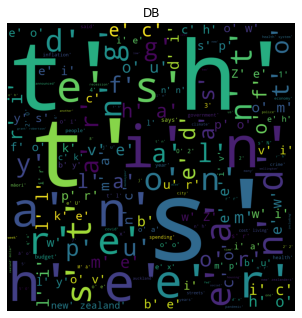

In [36]:
display_wordcloud(all_lists_USA, "USA")
display_wordcloud(all_lists_TL, "Thailand")
display_wordcloud(all_lists_NZ, "NZ")
display_wordcloud(all_lists_HK, "HK")
display_wordcloud(all_lists_DB, "DB")

In [55]:
dataFrame = pd.DataFrame({"Country":['United States of America', 'Thailand', 'New Zealand', 'Hong Kong', 'United Arab Emirates'],
                           "Total word count": [article_word_cnt_USA, article_word_cnt_TL, article_word_cnt_NZ, article_word_cnt_HK, article_word_cnt_DB],
                           "Number of stopwords": [article_word_cnt_USA - len(all_lists_USA), article_word_cnt_TL - len(all_lists_TL), article_word_cnt_NZ - len(all_lists_NZ), article_word_cnt_HK - len(all_lists_HK), article_word_cnt_DB - len(all_lists_DB)],
                           "Filtered word count": [len(all_lists_USA), len(all_lists_TL), len(all_lists_NZ), len(all_lists_HK), len(all_lists_DB)]})
dataFrame


,Country,Total word count,Number of stopwords,Filtered word count
0,United States of America,26220,23416,2804
1,Thailand,23855,21355,2500
2,New Zealand,13624,12163,1461
3,Hong Kong,15365,13585,1780
4,United Arab Emirates,19086,17047,2039


In [53]:
fig = px.bar(dataFrame, x='Country', y=['Total word count', 'Number of stopwords', 'Filtered word count'], title='Word count')
fig.show()

'1'